Импортируем библиотеки

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Загрузка базы данных

In [76]:
df = pd.read_excel('database.xlsx')
df.head()

sns.set_theme(style="darkgrid")

### Предобработка данных

Заменяем NaN на 0

In [77]:
df.isna().sum()

record_id                        0
athlete_id                       0
event_name                       0
event_date                       0
n_runners                        0
finish_time                      0
position                         0
athlete_gender                   0
athlete_age                      0
best_time                        0
worst_time                       0
mean_time                        0
median_time                      0
times                            0
num_locations                    0
home                             0
temp                             0
feels_like                       0
pressure                         0
humidity                         0
dew_point                        0
clouds                           0
wind_speed                       0
wind_deg                         0
weather.main                     0
weather.description              0
rain.1h                      67680
snow.1h                      71970
track_description_su

In [78]:
df = df.fillna({'rain.1h': 0, 'snow.1h': 0})

In [79]:
df.isna().sum()

record_id                    0
athlete_id                   0
event_name                   0
event_date                   0
n_runners                    0
finish_time                  0
position                     0
athlete_gender               0
athlete_age                  0
best_time                    0
worst_time                   0
mean_time                    0
median_time                  0
times                        0
num_locations                0
home                         0
temp                         0
feels_like                   0
pressure                     0
humidity                     0
dew_point                    0
clouds                       0
wind_speed                   0
wind_deg                     0
weather.main                 0
weather.description          0
rain.1h                      0
snow.1h                      0
track_description_surface    0
dtype: int64

Вводим новую переменную для обозначения увеличения прогресса бегуна

In [80]:
df['impr'] = df['mean_time'] - df['best_time']

Устраняем выбросы количественных признаков

In [81]:
num_features = df.select_dtypes(include=[np.number])
num_features.drop(
    ['record_id', 'athlete_id', 'position', 'rain.1h', 'snow.1h'],
    axis=1,
    inplace=True)
# num_features.hist(figsize=(16, 20), bins=50,xlabelsize=8, ylabelsize=8, grid=False);

In [82]:
for col in num_features.columns:
	print('{:15}'.format(col),
				'Skewness: {:05.2f}'.format(num_features[col].skew()) ,
				'   ' ,
				'Kurtosis: {:06.2f}'.format(num_features[col].kurt())
				)

n_runners       Skewness: 03.81     Kurtosis: 017.05
finish_time     Skewness: 36.34     Kurtosis: 4937.04
athlete_age     Skewness: -0.12     Kurtosis: 000.61
best_time       Skewness: 43.24     Kurtosis: 6256.48
worst_time      Skewness: 27.53     Kurtosis: 3383.12
mean_time       Skewness: 41.23     Kurtosis: 5879.16
median_time     Skewness: 40.42     Kurtosis: 5718.56
times           Skewness: 02.05     Kurtosis: 005.01
num_locations   Skewness: 13.41     Kurtosis: 291.16
temp            Skewness: -0.66     Kurtosis: 000.29
feels_like      Skewness: -0.64     Kurtosis: -00.06
pressure        Skewness: -0.51     Kurtosis: 000.99
humidity        Skewness: -0.69     Kurtosis: -00.20
dew_point       Skewness: -0.81     Kurtosis: 000.79
clouds          Skewness: -0.16     Kurtosis: -01.70
wind_speed      Skewness: 00.48     Kurtosis: 000.20
wind_deg        Skewness: -0.08     Kurtosis: -01.16
impr            Skewness: 02.44     Kurtosis: 010.07


In [83]:
def IQR(df, features):
	for c in features:
		median = df[c].median()  
		Q1, Q3 = df[c].quantile([0.25, 0.75]) 
		IQR = Q3 - Q1
		lower, upper = median - 1.5 * IQR, median + 1.5 * IQR
		df = df[(df[c] >= lower) & (df[c] <= upper)]
	return df

def std_method(df, features, n=3):
    for c in features:
        std = df[c].std()
        mean = df[c].mean()
        lower, upper = mean - n * std, mean + n * std
        df = df[(df[c] >= lower) & (df[c] <= upper)]
    return df

filtered = std_method(df, num_features.columns)
filtered.describe()

,record_id,athlete_id,event_date,n_runners,finish_time,position,athlete_age,best_time,worst_time,mean_time,...,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,rain.1h,snow.1h,impr
count,65246.000000,6.524600e+04,65246,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000,...,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000,65246.000000
mean,9989.888284,7.901350e+08,2023-08-10 15:47:10.187291136,59.161711,1779.534791,35.234957,34.615547,1703.785228,1917.676808,1787.426920,...,8.224011,1014.219753,75.814318,5.545693,52.252000,3.625953,182.633541,0.056336,0.010498,83.641692
min,4752.000000,7.900555e+08,2023-01-01 00:00:00,1.000000,940.000000,1.000000,4.000000,940.000000,940.000000,940.000000,...,-25.240000,985.000000,25.000000,-20.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8380.250000,7.901297e+08,2023-06-10 00:00:00,26.000000,1517.000000,11.000000,29.000000,1454.000000,1626.000000,1541.000000,...,-1.340000,1009.000000,64.000000,-0.190000,0.000000,2.170000,90.000000,0.000000,0.000000,0.000000
50%,10086.000000,7.901372e+08,2023-08-19 00:00:00,42.000000,1740.000000,22.000000,36.000000,1661.000000,1875.000000,1755.000000,...,10.750000,1015.000000,79.000000,6.770000,55.000000,3.520000,190.000000,0.000000,0.000000,56.345238
75%,11700.000000,7.901464e+08,2023-10-14 00:00:00,69.000000,1999.000000,42.000000,42.000000,1909.000000,2170.000000,1999.904040,...,17.580000,1020.000000,89.000000,12.450000,99.000000,5.000000,272.000000,0.000000,0.000000,132.750000
max,15204.000000,7.901652e+08,2023-12-30 00:00:00,333.000000,3315.000000,387.000000,72.000000,2825.000000,3315.000000,2841.666667,...,40.270000,1043.000000,100.000000,24.220000,100.000000,9.010000,360.000000,2.790000,2.380000,427.888889
std,2146.724526,1.850156e+04,NaN,54.388251,362.836421,42.533419,12.252844,342.045690,403.529797,344.052150,...,11.694995,9.267173,16.736477,8.678723,41.895288,1.788610,107.704640,0.250254,0.067926,93.392564


In [84]:
for col in filtered[num_features.columns].columns:
	print('{:15}'.format(col),
		'Skewness: {:05.2f}'.format(dfc[col].skew()) ,
		'   ' ,
		'Kurtosis: {:06.2f}'.format(dfc[col].kurt())
		)

n_runners       Skewness: 00.64     Kurtosis: -00.39
finish_time     Skewness: 00.09     Kurtosis: -00.70
athlete_age     Skewness: -0.11     Kurtosis: -00.13
best_time       Skewness: 00.11     Kurtosis: -00.74
worst_time      Skewness: 00.04     Kurtosis: -00.61
mean_time       Skewness: 00.04     Kurtosis: -00.75
median_time     Skewness: 00.05     Kurtosis: -00.76
times           Skewness: 01.36     Kurtosis: 001.08
num_locations   Skewness: 00.00     Kurtosis: 000.00
temp            Skewness: -0.40     Kurtosis: -00.72
feels_like      Skewness: -0.49     Kurtosis: -00.72
pressure        Skewness: -0.01     Kurtosis: -00.64
humidity        Skewness: -0.36     Kurtosis: -00.85
dew_point       Skewness: -0.37     Kurtosis: -00.73
clouds          Skewness: -0.07     Kurtosis: -01.70
wind_speed      Skewness: 00.09     Kurtosis: -00.62
wind_deg        Skewness: -0.08     Kurtosis: -01.20
impr            Skewness: 00.89     Kurtosis: -00.33


Отсеиваем строки с повторяющимися данными о спортсменах

In [85]:
unique_df = filtered.drop_duplicates(subset=['athlete_id'])
print(len(unique_df['athlete_id']))

20404


### Анализ основных признаков

In [86]:
unique_df['athlete_gender'].value_counts()

athlete_gender
мужской    11509
женский     8895
Name: count, dtype: int64

athlete_gender
мужской    0.564056
женский    0.435944
Name: proportion, dtype: float64 athlete_gender
мужской    11509
женский     8895
Name: count, dtype: int64


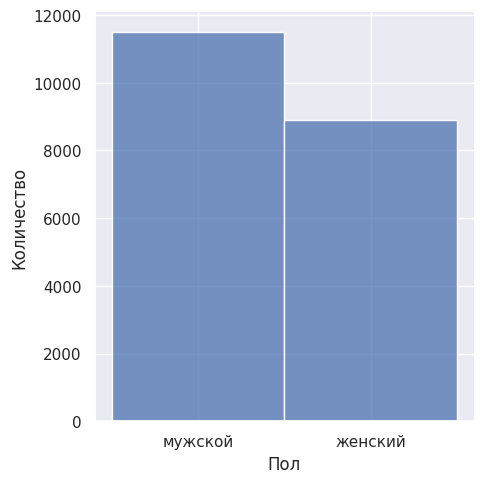

In [87]:
target = "athlete_gender"
fig = sns.displot(unique_df[target])

print(unique_df[target].value_counts(normalize=True),
		unique_df[target].value_counts())

plt.ylabel('Количество')
plt.xlabel('Пол')
# plt.ylim((0, 8000))

plt.savefig("graphics/gender")
plt.show(fig)

Среднее = 32.49
Медиана = 35.0
Стандартное отклонение = 12.483033199010638


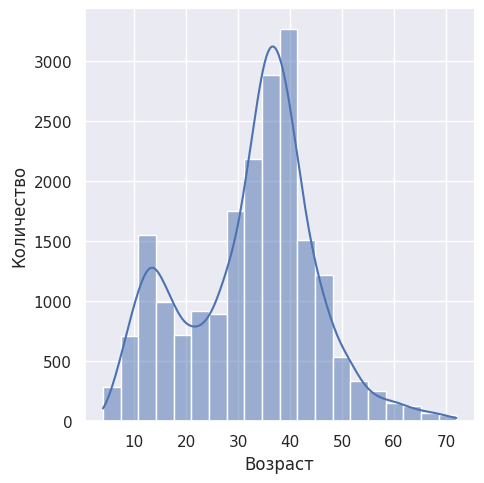

In [88]:
target = "athlete_age"

fig = sns.displot(unique_df[target], kde=True, bins=20)
target_mean = round(unique_df[target].mean(), 2)
target_median = unique_df[target].median()
target_std = unique_df[target].std()

print(f"Среднее = {target_mean}")
print(f"Медиана = {target_median}")
print(f"Стандартное отклонение = {target_std}")

plt.ylabel('Количество')
plt.xlabel('Возраст')

plt.savefig("graphics/age")
plt.show(fig)

Среднее = 1837.42
Медиана = 1802.0
Стандартное отклонение = 382.6115028277788


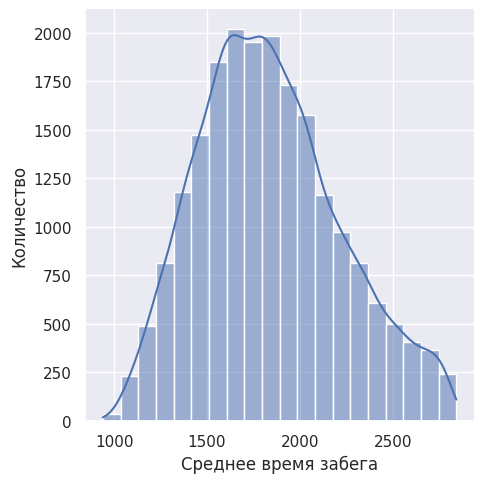

In [89]:
target = "mean_time"

fig = sns.displot(unique_df[target], kde=True, bins=20)
target_mean = round(unique_df[target].mean(), 2)
target_median = unique_df[target].median()
target_std = unique_df[target].std()

print(f"Среднее = {target_mean}")
print(f"Медиана = {target_median}")
print(f"Стандартное отклонение = {target_std}")

plt.ylabel('Количество')
plt.xlabel('Среднее время забега')

plt.savefig("graphics/mean_time")
plt.show(fig)

Среднее = 2.97
Медиана = 0.0
Стандартное отклонение = 25.26542332792903


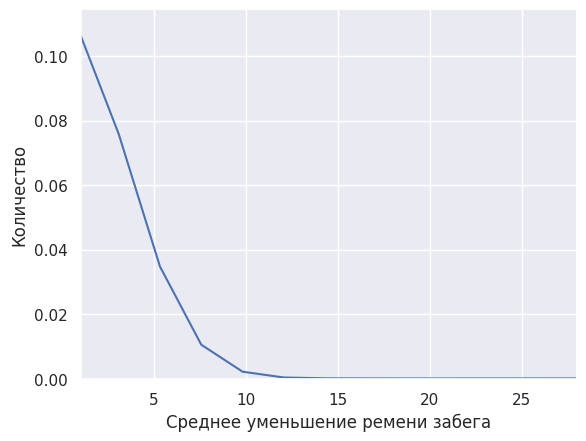

In [105]:
target = "impr"

fig = sns.kdeplot(unique_df[target])
target_mean = round(unique_df[target].mean(), 2)
target_median = unique_df[target].median()
target_std = unique_df[target].std()

print(f"Среднее = {target_mean}")
print(f"Медиана = {target_median}")
print(f"Стандартное отклонение = {target_std}")

plt.ylabel('Количество')
plt.xlabel('Среднее уменьшение ремени забега')
plt.xlim((1, 28))

plt.savefig("graphics/improvement")
plt.show(fig)

### Исследуем корреляции

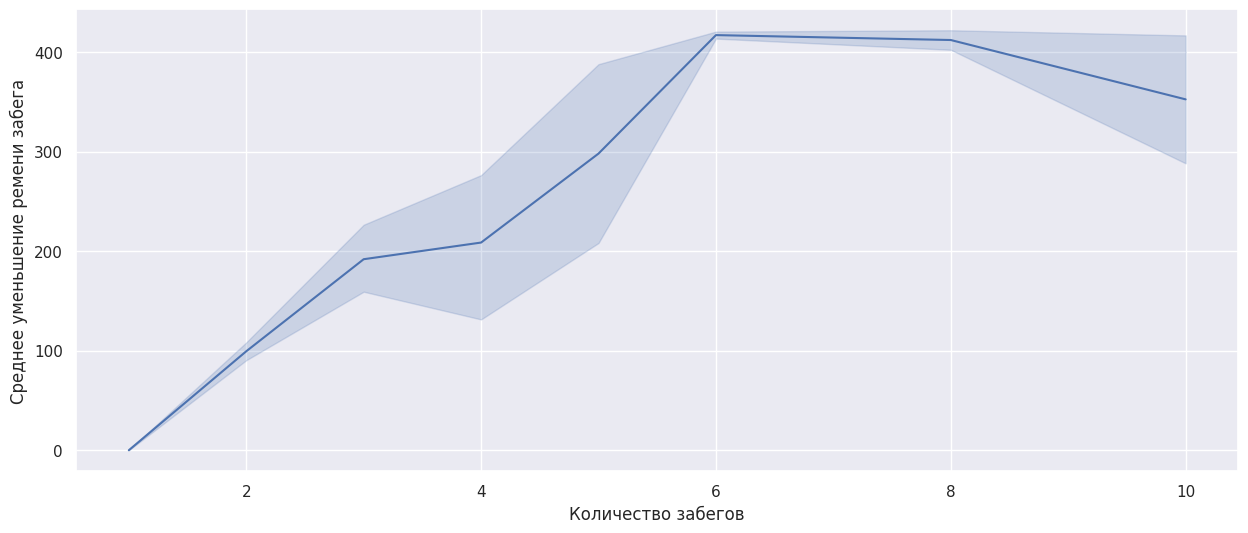

In [111]:
plt.figure(figsize=(15, 6))

fig = sns.lineplot(data=unique_df, x='times', y='impr')
plt.ylabel('Среднее уменьшение ремени забега')
plt.xlabel('Количество забегов')
# plt.ylim((1, 530))

plt.savefig("graphics/improvement-times")
plt.show(fig)

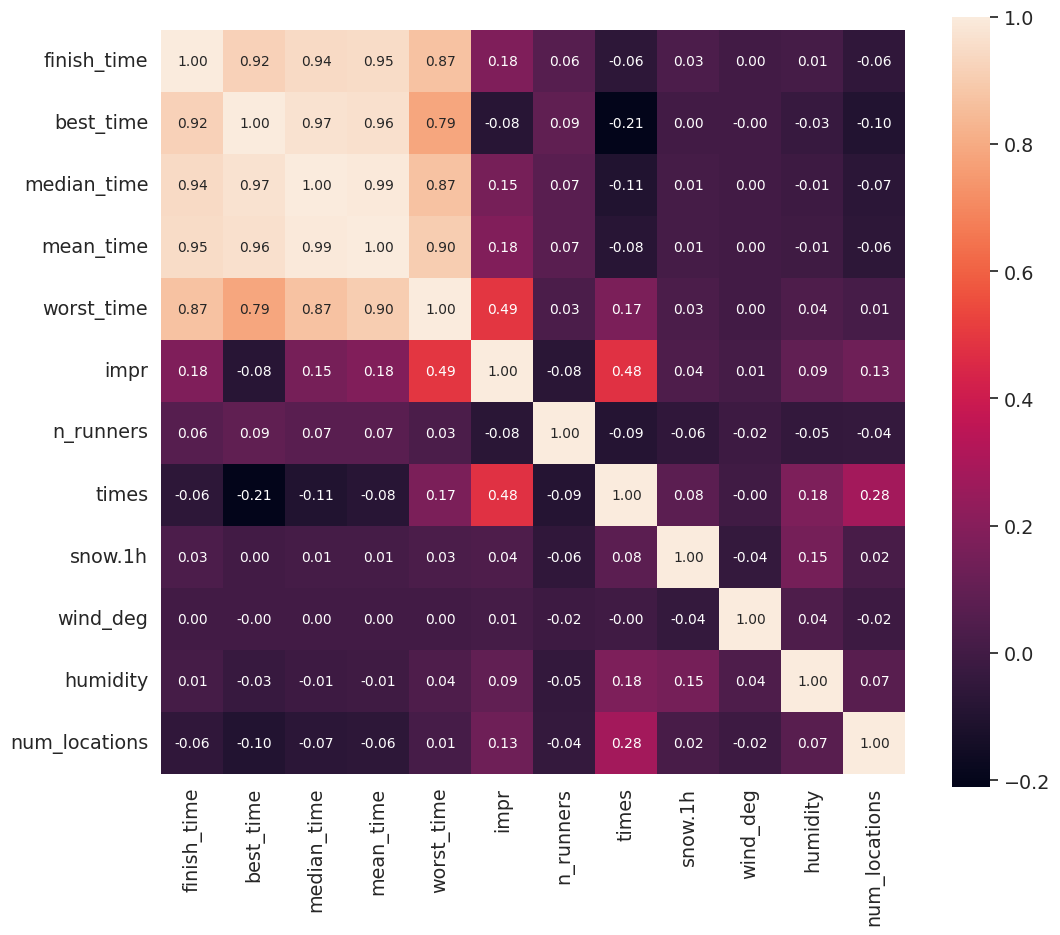

In [112]:
corr_df = unique_df.drop(columns=list(df.select_dtypes(
	include=['object'])) + ['event_date', 'athlete_id', 'record_id', 'position'])


plt.figure(figsize=(12, 10))
corrmat = corr_df.corr()
cols = corrmat.nlargest(12, 'finish_time')['finish_time'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig("graphics/hm.png") 
plt.show(hm)

### Проверяем гипотезу по критерию Манна Уитни (U-критерий) и ANOVA

Разделение по полу

In [116]:
men = unique_df[unique_df['athlete_gender']=='мужской']
women = unique_df[unique_df['athlete_gender']=='женский']

print(format(stats.mannwhitneyu(men['impr'], women['impr'])[1], 'f'))

0.150626


Разделение по возрасту

In [117]:
mean = round(unique_df['athlete_age'].mean())
gr1 = unique_df[unique_df['athlete_age']<=mean]
gr2 = unique_df[unique_df['athlete_age']>mean]
print(format(stats.mannwhitneyu(gr1['impr'], gr2['impr'])[1], 'f'))
print(format(stats.mannwhitneyu(gr1['impr'], gr2['impr'])[1], 'f'))

0.031410
0.031410


In [165]:
cats, bins = pd.cut(unique_df['athlete_age'], 4, retbins=True)
print(cats)
gr1 = unique_df[unique_df['athlete_age'] <= 21]
gr2 = unique_df[(unique_df['athlete_age'] > 21) & (unique_df['athlete_age'] <= 38)]
gr3 = unique_df[(unique_df['athlete_age'] > 38) & (unique_df['athlete_age'] < 55)]
gr4 = unique_df[unique_df['athlete_age'] >= 55]

0        (38.0, 55.0]
4        (21.0, 38.0]
5        (38.0, 55.0]
7        (38.0, 55.0]
10       (21.0, 38.0]
             ...     
74964    (21.0, 38.0]
74966    (38.0, 55.0]
74967    (38.0, 55.0]
74968    (21.0, 38.0]
74979    (21.0, 38.0]
Name: athlete_age, Length: 20404, dtype: category
Categories (4, interval[float64, right]): [(3.932, 21.0] < (21.0, 38.0] < (38.0, 55.0] < (55.0, 72.0]]


In [167]:
print(format(stats.f_oneway(gr1['impr'], gr2['impr'], gr3['impr'], gr4['impr'])[1], 'f'))

0.000033
